<a href="https://colab.research.google.com/github/luizindio/fuzzy-monitoramento/blob/main/C%C3%B3pia_de_IA_Monitoramento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
# Instalando a biblioteca Fuzzy
!pip install scikit-fuzzy

In [103]:
# Importando Bibliotecas Essenciais
import numpy as np
import skfuzzy as fuzz # Importando biblioteca Fuzzy
from skfuzzy import control as ctrl # Importando biblioteca de controle do Fuzzy
import pandas as pd
import matplotlib.pyplot as plt # Gera gráficos com os dados
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [104]:
# Buscando os dados em arquivo excel
dados = pd.read_excel('/content/Dados-IA-Monitoração-2.xlsx')

In [105]:
# Inicia as variáveis buscando dados por colunas
result = dados['ResultCode']
time = dados['DurationMs']
req = dados['requests']
success = dados['Success']


Função Antecedente x Consequente

In [106]:
result = ctrl.Antecedent(result, 'result')
time = ctrl.Antecedent(time, 'time')
req = ctrl.Antecedent(req, 'req')
success = ctrl.Antecedent(success, 'success')

In [107]:
slo = ctrl.Consequent(np.arange(0, 21, 1), 'slo')

Funções Membership

In [108]:

result.automf(number = 3, names = ['bom', 'atencao', 'ruim'])
time.automf(number = 3, names = ['baixa', 'media', 'alta'])
req.automf(number = 3, names = ['baixa', 'media', 'alta'])
success.automf(number = 2, names = ['bom', 'ruim'])

Membership functions

In [109]:
#função triangular
slo['bom'] = fuzz.trimf(slo.universe, [0, 0, 10])
slo['ruim'] = fuzz.trimf(slo.universe, [10, 20, 20])

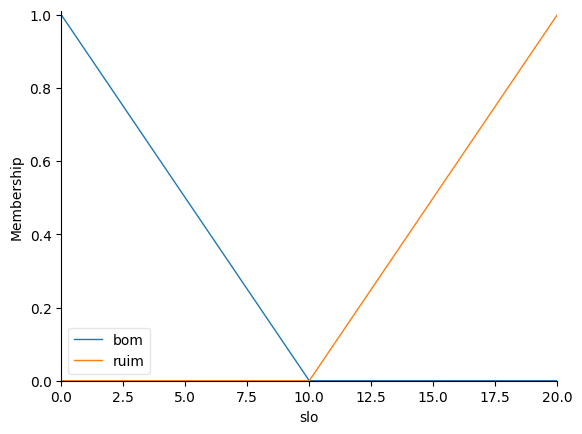

In [110]:
slo.view()

In [111]:
regra1 = ctrl.Rule(result['bom'] | req['baixa'] | time['baixa'] | success['bom'] , slo['bom'])
regra2 = ctrl.Rule(result['bom'] | time['baixa'] | success['bom'] , slo['bom'])
regra3 = ctrl.Rule(result['atencao'] | time['media'] | success['ruim'], slo['ruim'])
regra4 = ctrl.Rule(result['ruim'] | success['ruim'], slo['ruim'])
regra5 = ctrl.Rule(req['baixa'] | time['baixa'] | success['bom'], slo['bom'])
regra6 = ctrl.Rule(req['media'] | time['media'] | success['bom'], slo['bom'])
regra7 = ctrl.Rule(req['alta'] | time['alta'] | success['bom'], slo['ruim'])
regra8 = ctrl.Rule(req['alta'] | time['alta'] | success['ruim'], slo['ruim'])
regra9 = ctrl.Rule(success['bom'] | time['baixa'], slo['bom'])


Sistemas de Controle

In [112]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])

In [113]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [114]:
sistema.input['result'] = 200
sistema.input['req'] = 1
sistema.input['time'] = 200
sistema.input['success'] = 1
sistema.compute()

In [115]:
resultados_lista = []

for i in range(len(dados)):
    resultado = sistema.input['result'] = dados['ResultCode'][i]
    req_value = sistema.input['req'] = dados['requests'][i]
    time_value = sistema.input['time'] = dados['DurationMs'][i]
    success_value = sistema.input['success'] = dados['Success'][i]

    # Obtém o resultado
    resultado_slo = sistema.output['slo']

    # Adiciona o resultado à lista
    resultados_lista.append(resultado_slo)

# Imprime a lista de resultados
print("Lista de resultados:", resultados_lista)

Lista de resultados: [3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.3333333

In [116]:
# Adiciona a lista de resultados como uma nova coluna no DataFrame 'dados'
dados['Resultados'] = resultados_lista

# Salva o DataFrame atualizado em um novo arquivo Excel
dados.to_excel('/content/Dados-IA-Monitoração-2.xlsx', index=False)


In [117]:
dados.head()

,ResultCode,DurationMs,requests,Success,Resultados
0,200,200,2285,1,3.333333
1,200,166,485,1,3.333333
2,200,569,259,1,3.333333
3,200,264,488,1,3.333333
4,200,287,342,1,3.333333


3.333333333333333


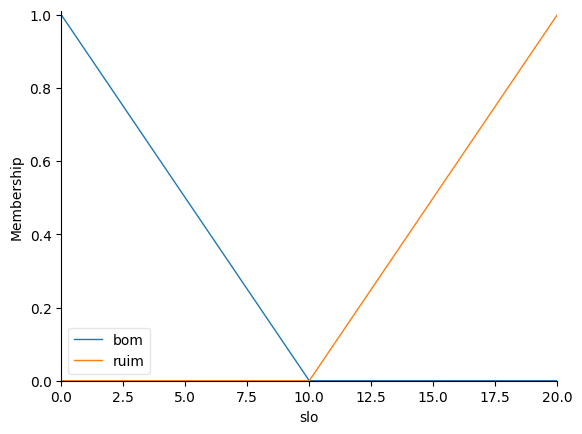

In [118]:
print(sistema.output['slo'])
slo.view(sim = sistema)

Analise de IA Opção *1*

In [168]:


# Carrega os dados
dados = pd.read_excel('/content/Dados-IA-Monitoração-2.xlsx')

# Inicia as variáveis buscando dados por colunas
result = ctrl.Antecedent(np.arange(0, 300, 1), 'result')
time = ctrl.Antecedent(np.arange(0, 1000, 1), 'time')
req = ctrl.Antecedent(np.arange(0, 3000, 1), 'req')
success = ctrl.Antecedent(np.arange(0, 2, 1), 'success')
slo = ctrl.Consequent(np.arange(0, 21, 1), 'slo')

result.automf(number=3, names=['bom', 'atencao', 'ruim'])
time.automf(number=3, names=['baixa', 'media', 'alta'])
req.automf(number=3, names=['baixa', 'media', 'alta'])
success.automf(number=2, names=['bom', 'ruim'])


slo.universe = np.arange(0, 21, 1)
# Função triangular
slo['bom'] = fuzz.trimf(slo.universe, [0, 0, 10])
slo['ruim'] = fuzz.trimf(slo.universe, [10, 20, 20])

regra1 = ctrl.Rule(result['bom'] | req['baixa'] | time['baixa'] | success['bom'], slo['bom'])
regra2 = ctrl.Rule(result['bom'] | time['baixa'] | success['bom'], slo['bom'])
regra3 = ctrl.Rule(result['atencao'] | time['media'] | success['ruim'], slo['ruim'])
regra4 = ctrl.Rule(result['ruim'] | success['ruim'], slo['ruim'])
regra5 = ctrl.Rule(req['baixa'] | time['baixa'] | success['bom'], slo['bom'])
regra6 = ctrl.Rule(req['media'] | time['media'] | success['bom'], slo['bom'])
regra7 = ctrl.Rule(req['alta'] | time['alta'] | success['bom'], slo['ruim'])
regra8 = ctrl.Rule(req['alta'] | time['alta'] | success['ruim'], slo['ruim'])
regra9 = ctrl.Rule(success['bom'] | time['baixa'], slo['bom'])

sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])

resultados_lista = []

for i in range(len(dados)):
    sistema = ctrl.ControlSystemSimulation(sistema_controle)  # Cria um novo sistema para cada iteração

    sistema.input['result'] = dados['ResultCode'][i]
    sistema.input['req'] = dados['requests'][i]
    sistema.input['time'] = dados['DurationMs'][i]
    sistema.input['success'] = dados['Success'][i]

    sistema.compute()

    # Obtém o resultado
    resultado_slo = sistema.output['slo']

    # Adiciona o resultado à lista
    resultados_lista.append(resultado_slo)

# Imprime a lista de resultados
print("Lista de resultados:", resultados_lista)


Lista de resultados: [10.75514793545239, 10.492434476495692, 10.093211284796238, 10.498514084443057, 10.24673714916297, 10.447112368043578, 10.71164751947119, 10.037191639659047, 10.687288105122231, 10.032569453462708, 10.085446553044621, 10.171100811753222, 10.658666402456074, 10.033629958529147, 10.224505834966163, 10.680070572187342, 10.40862072805652, 10.032087785843743, 10.682471802597771, 10.576726774663594, 10.18316695059857, 10.280526275955062, 10.626106266187483, 10.232030187276466, 10.793824486597224, 10.02631970006192, 11.134148107900634, 10.817549615915926, 10.436610093442745, 10.114891111109234, 10.025847961949994, 10.3254087770809, 10.137867185671306, 10.011671652639995, 10.00149476070925, 10.877400412531337, 10.15715651769462, 10.009989847867683, 10.261894114203916, 10.209826386039929, 10.123835096758656, 10.558226412629729, 10.321337639110949, 10.061957182470339, 10.310075899435985, 10.113432414178767, 10.376287212024833, 10.047020652975053, 10.378047818089001, 11.12936

In [169]:
dados.head()

,ResultCode,DurationMs,requests,Success,Resultados
0,200,200,2285,1,10.755148
1,200,166,485,1,10.492434
2,200,569,259,1,10.093211
3,200,264,488,1,10.498514
4,200,287,342,1,10.246737


In [171]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Seu código fuzzy aqui...

# Após calcular os resultados fuzzy
dados['slo'] = resultados_lista  # Renomeie para 'slo'

# Substitua 'SLO' pelo nome correto da sua variável de saída
y = dados['slo']  # 'slo' (com letra minúscula), não 'SLO'

# Seleciona as variáveis de entrada (features) e a variável de saída (target)
X = dados[['ResultCode', 'requests', 'DurationMs', 'Success', 'slo']]



# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values

# Treina o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Faz previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avalia o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Agora você pode usar o modelo treinado para fazer previsões em novos dados
# Exemplo:
new_data = pd.DataFrame({'ResultCode': [201], 'requests': [2300], 'DurationMs': [250], 'Success': [1], 'fuzzy_result': [model.predict([[200, 2300, 250, 1, resultados_lista[0]]])[0]]})
print(f'Predicted SLO: {new_data["fuzzy_result"].values[0]}')


Mean Squared Error: 1.5635341767180487e-28
Predicted SLO: 10.755147935452364


In [163]:
# Adiciona a lista de resultados como uma nova coluna no DataFrame 'dados'
dados['Resultados'] = resultados_lista

# Salva o DataFrame atualizado em um novo arquivo Excel
dados.to_excel('/content/Dados-IA-Monitoração-2.xlsx', index=False)

In [164]:
dados.head()

,ResultCode,DurationMs,requests,Success,Resultados
0,200,200,2285,1,10.755148
1,200,166,485,1,10.492434
2,200,569,259,1,10.093211
3,200,264,488,1,10.498514
4,200,287,342,1,10.246737
